# [GitHub url]


https://github.com/DongwookKim0823/2021-DeepLearning

### Load packages

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

### MNIST train, test dataset 가져오기

In [3]:
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(),
                        target_transform=None, download=True)
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

### 대략적인 데이터 형태

('mnist_train \xea\xb8\xb8\xec\x9d\xb4 : ', 60000)
('mnist_test \xea\xb8\xb8\xec\x9d\xb4 : ', 10000)
('image data \xed\x98\x95\xed\x83\x9c : ', torch.Size([1, 28, 28]))
('label : ', 5)


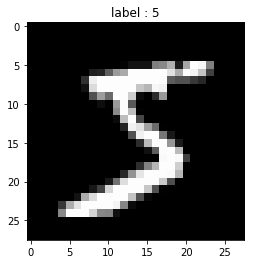

In [4]:
print("mnist_train 길이 : ", len(mnist_train))
print("mnist_test 길이 : ", len(mnist_test))

image, label = mnist_train.__getitem__(0)
print("image data 형태 : ", image.size())
print("label : ", label)

img = image.numpy()
plt.title("label : %d" %label)
plt.imshow(img[0], cmap="gray")
plt.show()

### MNIST data 띄워보기

5
torch.Size([1, 28, 28])
5


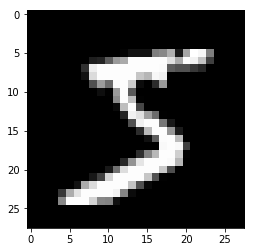

0


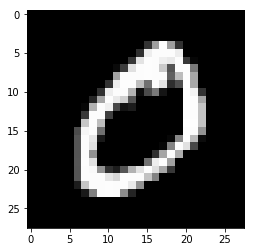

4


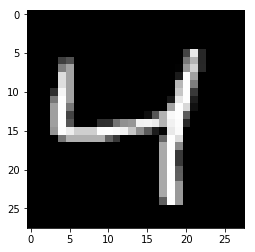

In [5]:
print(mnist_train[0][1])
print(mnist_train[0][0].size())

for i in range(3):
    img = mnist_train[i][0].numpy()
    print(mnist_train[i][1])
    plt.imshow(img[0], cmap='gray')
    plt.show()

### Convolution 하나 씌워보기

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


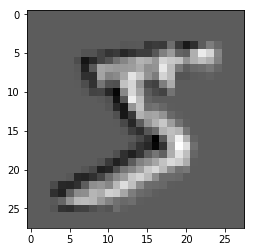

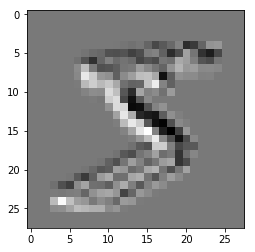

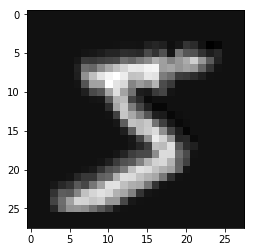

In [6]:
image, label = mnist_train[0]
image = image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())
print(label)

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
output = conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0, i, :,:].data.numpy(), cmap='gray')
    plt.show()

### CNN 만들기

#### train, test data 가져오기

In [7]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate = 0.0002
num_epoch = 10

In [8]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size,
                                          shuffle=True, num_workers=2, 
                                          drop_last=True) 
test_loader = torch.utils.data.DataLoader((mnist_test), batch_size=batch_size,
                                         shuffle=False, num_workers=2,
                                         drop_last=True)

### CNN 클래스 만들기(모델 만들기)

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(1, 16, 5, padding=2),
            nn.ReLU(),

            nn.Conv2d(16, 32, 5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(32, 64, 5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        self.fc_layer=nn.Sequential(
            nn.Linear(64*7*7, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        out = self.layer(x)
        out = out.view(batch_size, -1)
        out = self.fc_layer(out)
        return out
    
model = CNN() #.cuda()

In [11]:
for parameter in model.parameters():
    #print(parameter)
    print(parameter.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [13]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### optimization

In [14]:
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        x = Variable(image) #.cuda()
        y_ = Variable(label) #.cuda()
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()
        
        if j % 50 == 0:
            print(loss, j, i)

(tensor(2.3061, grad_fn=<NllLossBackward>), 0, 0)
(tensor(1.4786, grad_fn=<NllLossBackward>), 50, 0)
(tensor(0.5963, grad_fn=<NllLossBackward>), 0, 1)
(tensor(0.9015, grad_fn=<NllLossBackward>), 50, 1)
(tensor(0.1433, grad_fn=<NllLossBackward>), 0, 2)
(tensor(0.3858, grad_fn=<NllLossBackward>), 50, 2)
(tensor(0.3281, grad_fn=<NllLossBackward>), 0, 3)
(tensor(0.1290, grad_fn=<NllLossBackward>), 50, 3)
(tensor(0.3333, grad_fn=<NllLossBackward>), 0, 4)
(tensor(0.2077, grad_fn=<NllLossBackward>), 50, 4)
(tensor(0.0684, grad_fn=<NllLossBackward>), 0, 5)
(tensor(0.2454, grad_fn=<NllLossBackward>), 50, 5)
(tensor(0.0416, grad_fn=<NllLossBackward>), 0, 6)
(tensor(0.0426, grad_fn=<NllLossBackward>), 50, 6)
(tensor(0.0861, grad_fn=<NllLossBackward>), 0, 7)
(tensor(0.0391, grad_fn=<NllLossBackward>), 50, 7)
(tensor(0.0064, grad_fn=<NllLossBackward>), 0, 8)
(tensor(0.2088, grad_fn=<NllLossBackward>), 50, 8)
(tensor(0.0085, grad_fn=<NllLossBackward>), 0, 9)
(tensor(0.0284, grad_fn=<NllLossBackward>

In [15]:
# 모델 저장시키기
torch.save(model, 'nets/mycnn_model_%d.pkl' %(num_epoch))

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [16]:
try:
    # 미리 학습시킨 네트워크의 파라미터 집합 (피클)
    model = torch.load('nets/mycnn_model_10.pkl')
    print("model restored")
except:
    print("model not restored")

model restored


In [18]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0
    
    for j, [imgs, labels] in enumerate(dloader):
        img = Variable(imgs)
        label = Variable(labels)
        
        
        output = imodel.forward(img)
        _, output_index = torch.max(output, 1)
        
        total += label.size(0) 
        correct += (output_index == label).sum().float()
    
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [19]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 94.6299972534
